In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_url = 'https://finviz.com/quote.ashx?t='

In [11]:
stock_names = ['RS', 'GOOG', 'FB']

In [12]:
news_tables = {}
for name in stock_names:
    url = base_url + name

    req = Request(url=url, headers={'user-agent': 'test-app'})
    response = urlopen(req)
    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[name] = news_table
    
print(news_tables)

{'RS': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Jan-19-22 05:25PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/alcoa-aa-q4-earnings-revenues-222510385.html" target="_blank">Alcoa (AA) Q4 Earnings and Revenues Surpass Estimates</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Zacks</span></div></div></td></tr>
<tr><td align="right" style="white-space:nowrap" width="130">Jan-17-22 03:38PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/yacktman-fund-buys-reliance-steel-203801996.html" target="_blank">Yacktman Fund Buys Reliance Steel &amp; Aluminum Co, Samsung C&amp;T Corp, Associated British ...</a></div><div class="news-link-right"><

In [13]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])
        
print(parsed_data)

[['RS', 'Jan-19-22', '05:25PM\xa0\xa0', 'Alcoa (AA) Q4 Earnings and Revenues Surpass Estimates'], ['RS', 'Jan-17-22', '03:38PM\xa0\xa0', 'Yacktman Fund Buys Reliance Steel & Aluminum Co, Samsung C&T Corp, Associated British ...'], ['RS', 'Jan-17-22', '02:38PM\xa0\xa0', 'Yacktman Focused Fund Buys Reliance Steel & Aluminum Co, Samsung C&T Corp, Hyundai ...'], ['RS', 'Jan-17-22', '07:24AM\xa0\xa0', 'Zacks Investment Ideas feature highlights: The SDPR S&P Metals and Mining ETF, Freeport-McMoRan Inc, Reliance Steel & Aluminum Co and Arch Resources, Inc'], ['RS', 'Jan-14-22', '01:01PM\xa0\xa0', 'How to Adapt to the Market Environment This Year'], ['RS', 'Jan-12-22', '09:38AM\xa0\xa0', 'Shilanski & Associates, Inc. Buys Olin Corp, Coterra Energy Inc, Fortinet Inc, Sells Staar ...'], ['RS', 'Jan-10-22', '12:00PM\xa0\xa0', "Investors Will Want Reliance Steel & Aluminum's (NYSE:RS) Growth In ROCE To Persist"], ['RS', 'Jan-05-22', '04:26PM\xa0\xa0', "Here's Why You Should Buy Reliance Steel (RS)

In [14]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

print(df.head())

  ticker       date       time  \
0     RS  Jan-19-22  05:25PM     
1     RS  Jan-17-22  03:38PM     
2     RS  Jan-17-22  02:38PM     
3     RS  Jan-17-22  07:24AM     
4     RS  Jan-14-22  01:01PM     

                                               title  
0  Alcoa (AA) Q4 Earnings and Revenues Surpass Es...  
1  Yacktman Fund Buys Reliance Steel & Aluminum C...  
2  Yacktman Focused Fund Buys Reliance Steel & Al...  
3  Zacks Investment Ideas feature highlights: The...  
4   How to Adapt to the Market Environment This Year  


In [15]:
vader = SentimentIntensityAnalyzer()

In [16]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

print(df)

    ticker        date       time  \
0       RS  2022-01-19  05:25PM     
1       RS  2022-01-17  03:38PM     
2       RS  2022-01-17  02:38PM     
3       RS  2022-01-17  07:24AM     
4       RS  2022-01-14  01:01PM     
..     ...         ...        ...   
295     FB  2022-01-26  08:05AM     
296     FB  2022-01-26  07:47AM     
297     FB  2022-01-26  06:00AM     
298     FB  2022-01-26  12:58AM     
299     FB  2022-01-25  10:00PM     

                                                 title  compound  
0    Alcoa (AA) Q4 Earnings and Revenues Surpass Es...    0.0000  
1    Yacktman Fund Buys Reliance Steel & Aluminum C...    0.0000  
2    Yacktman Focused Fund Buys Reliance Steel & Al...    0.3818  
3    Zacks Investment Ideas feature highlights: The...    0.0000  
4     How to Adapt to the Market Environment This Year    0.0000  
..                                                 ...       ...  
295  Better Metaverse Stock: Meta Platforms vs. Mic...    0.4404  
296  Meta Platforms

<Figure size 720x576 with 0 Axes>

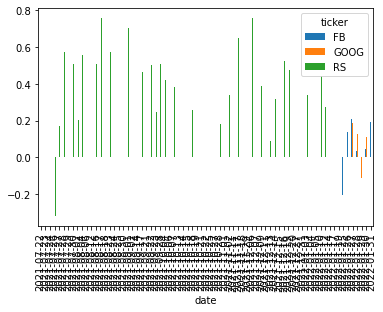

In [17]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()